<a href="https://colab.research.google.com/github/Leo270499/Apuntes/blob/main/Proyecto_ComplementarioI_S%C3%A1nchez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quinto desafío | Práctica Integradora DS

## 1 | Introducción
Para esta práctica dirigida he tomado como dataset `customer.csv` que me permitira trabajar algoritmos de machine learning de clasificación.

### Abstract

El presente dataset tiene como objetivo predecir el valor de `churn`, que significa si la persona se retiro o continua con la compañia de telecomunicaciones.

*   `Mayor60Años`
*   `Conyuge`
*   `Dependientes`
*   `MesesDeContrato`
*   `TelefonoFijo`
*   `VariasLineasTelefonicas`
*   `ServicioDeInternet`
*   `SeguridadOnline`
*   `SeguroEnDispositivo`
*   `SoporteTecnico`
*   `TVCable`
*   `Streaming`
*   `TipoDeContrato`
*   `PagoOnline`
*   `FormaDePago`
*   `CuentaMensual`
*   `Churn`


**Variable Objetivo:** Churn

### Herramientas y datos

**Librerias**

In [1]:
# Codigo para trabajar con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Librerias
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

**Dataset**

In [3]:
PATH = "/content/drive/MyDrive/Quinto Desafío (Data Science)/Customer.csv"
df = pd.read_csv(PATH)

In [4]:
df.sample(5)

,Mayor60Años,Conyuge,Dependientes,MesesDeContrato,TelefonoFijo,VariasLineasTelefonicas,ServicioDeInternet,SeguridadOnline,BackupOnline,SeguroEnDispositivo,SoporteTecnico,TVCable,Streaming,TipoDeContrato,PagoOnline,FormaDePago,CuentaMensual,Churn
6652,0,No,No,36,Si,No,No,SinServicioDeInternet,SinServicioDeInternet,SinServicioDeInternet,SinServicioDeInternet,SinServicioDeInternet,SinServicioDeInternet,DosAños,Si,TarjetaDeCredito,18.55,No
1975,0,No,No,21,Si,No,No,SinServicioDeInternet,SinServicioDeInternet,SinServicioDeInternet,SinServicioDeInternet,SinServicioDeInternet,SinServicioDeInternet,DosAños,No,ChequePapel,19.60,No
1110,0,No,No,60,No,SinServicioTelefonico,DSL,Si,Si,Si,No,No,No,DosAños,No,DebitoEnCuenta,39.60,No
4740,1,Si,No,24,No,SinServicioTelefonico,DSL,Si,No,No,No,No,Si,Mensual,No,DebitoEnCuenta,39.10,Si
360,0,No,Si,5,Si,No,No,SinServicioDeInternet,SinServicioDeInternet,SinServicioDeInternet,SinServicioDeInternet,SinServicioDeInternet,SinServicioDeInternet,Mensual,No,ChequePapel,20.20,No


## 2 | Preparación del dataset

In [5]:
df.shape

(7043, 18)

In [6]:
#Modificación de forma manual
diccionario = {'Si': 1,
                'No': 0}

dfmodificado = df[['Conyuge', 'Dependientes', 'TelefonoFijo', 'PagoOnline', 'Churn']].replace(diccionario)
dfmodificado.head()

,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [7]:
#Transformación con get_dummies
dummie_df= pd.get_dummies(df.drop(['Conyuge', 'Dependientes', 'TelefonoFijo', 'PagoOnline', 'Churn'],
                axis=1))

#Unión de los datos transformados con los que ya teníamos
df_final = pd.concat([dfmodificado, dummie_df], axis=1)

In [8]:
df_final.head()

,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Churn,Mayor60Años,MesesDeContrato,CuentaMensual,VariasLineasTelefonicas_No,VariasLineasTelefonicas_Si,...,Streaming_No,Streaming_Si,Streaming_SinServicioDeInternet,TipoDeContrato_DosAños,TipoDeContrato_Mensual,TipoDeContrato_UnAño,FormaDePago_ChequeDigital,FormaDePago_ChequePapel,FormaDePago_DebitoEnCuenta,FormaDePago_TarjetaDeCredito
0,1,0,0,1,0,0,1,29.85,0,0,...,1,0,0,0,1,0,1,0,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,1,0,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,1,0,0
3,0,0,0,0,0,0,45,42.30,0,0,...,1,0,0,0,0,1,0,0,1,0
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,1,0,0,0


In [9]:
Xcliente = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

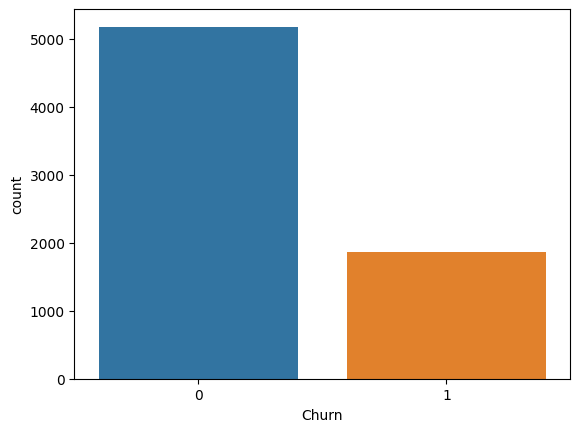

In [10]:
#variable target está desbalanceada
import seaborn as sns
%matplotlib inline
ax = sns.countplot(x='Churn', data=df_final)

In [11]:
df_final.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

**Balanceo de datos**

In [12]:
#biblioteca para balancear los datos utilizando over_sampling
from imblearn.over_sampling import SMOTE

In [13]:
#dividiendo los datos en características y target
X = df_final.drop('Churn', axis = 1)
y = df_final['Churn']

In [14]:
smt = SMOTE(random_state=42)
X, y = smt.fit_resample(X, y)

In [15]:
#unión de los datos balanceados
df_final = pd.concat([X, y], axis=1)

In [16]:
#verificación 1 - unión de los datos
df_final.head(2)

,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Mayor60Años,MesesDeContrato,CuentaMensual,VariasLineasTelefonicas_No,VariasLineasTelefonicas_Si,VariasLineasTelefonicas_SinServicioTelefonico,...,Streaming_Si,Streaming_SinServicioDeInternet,TipoDeContrato_DosAños,TipoDeContrato_Mensual,TipoDeContrato_UnAño,FormaDePago_ChequeDigital,FormaDePago_ChequePapel,FormaDePago_DebitoEnCuenta,FormaDePago_TarjetaDeCredito,Churn
0,1,0,0,1,0,1,29.85,0,0,1,...,0,0,0,1,0,1,0,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,...,0,0,0,0,1,0,1,0,0,0


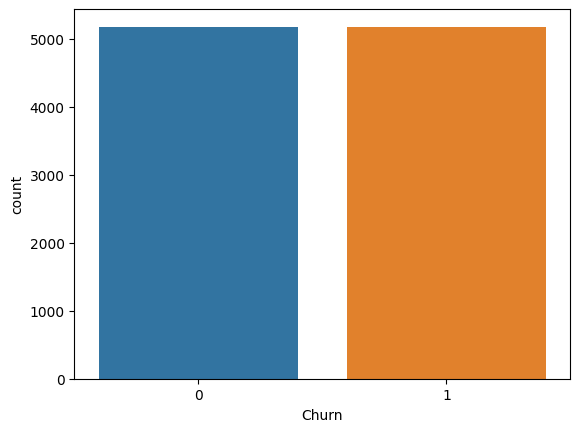

In [17]:
#verificación 2 - balanceamiento
ax = sns.countplot(x='Churn', data=df_final)

In [18]:
df_final.Churn.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

## 3 | Análisis Exploratorio de Datos (EDA)

In [19]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10348 entries, 0 to 10347
Data columns (total 39 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Conyuge                                        10348 non-null  int64  
 1   Dependientes                                   10348 non-null  int64  
 2   TelefonoFijo                                   10348 non-null  int64  
 3   PagoOnline                                     10348 non-null  int64  
 4   Mayor60Años                                    10348 non-null  int64  
 5   MesesDeContrato                                10348 non-null  int64  
 6   CuentaMensual                                  10348 non-null  float64
 7   VariasLineasTelefonicas_No                     10348 non-null  uint8  
 8   VariasLineasTelefonicas_Si                     10348 non-null  uint8  
 9   VariasLineasTelefonicas_SinServicioTelefonico  103

In [20]:
# Valores nulos EN NÚMERO
df.isnull().sum().sort_values(ascending=False)

Mayor60Años                0
Conyuge                    0
CuentaMensual              0
FormaDePago                0
PagoOnline                 0
TipoDeContrato             0
Streaming                  0
TVCable                    0
SoporteTecnico             0
SeguroEnDispositivo        0
BackupOnline               0
SeguridadOnline            0
ServicioDeInternet         0
VariasLineasTelefonicas    0
TelefonoFijo               0
MesesDeContrato            0
Dependientes               0
Churn                      0
dtype: int64

## 4 | Algoritmos de Machine Learning

### 4.1 | KNN

In [21]:
Xcliente

[[0,
  0,
  1,
  1,
  0,
  0,
  39.9,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1]]

In [22]:
#División en inputs y outputs
X = df_final.drop('Churn', axis = 1)
y = df_final['Churn']

In [23]:
#biblioteca para padronizar los datos
from sklearn.preprocessing import StandardScaler

In [24]:
norm = StandardScaler()
X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.26387878, -0.53144987, -3.04231798, ..., -0.47363024,
        -0.43977642, -0.42893087],
       [-0.79121512, -0.53144987,  0.32869674, ...,  2.11135168,
        -0.43977642, -0.42893087],
       [-0.79121512, -0.53144987,  0.32869674, ...,  2.11135168,
        -0.43977642, -0.42893087],
       ...,
       [-0.79121512, -0.53144987,  0.32869674, ..., -0.47363024,
        -0.43977642, -0.42893087],
       [-0.79121512, -0.53144987,  0.32869674, ..., -0.47363024,
        -0.43977642, -0.42893087],
       [-0.79121512, -0.53144987,  0.32869674, ..., -0.47363024,
        -0.43977642, -0.42893087]])

In [25]:
X_normalizado[0]

array([ 1.26387878, -0.53144987, -3.04231798,  0.80305014, -0.40900744,
       -1.11470659, -1.32844805, -0.88725382, -0.84017959,  3.21273451,
        1.51441199, -1.04974775, -0.44383835,  0.86964343, -0.52081961,
       -0.44383835, -0.95834643,  1.57985631, -0.44383835,  1.04306   ,
       -0.63971344, -0.44383835,  0.87084369, -0.52696167, -0.44383835,
        1.20167573, -0.78927885, -0.44383835,  1.20215622, -0.78589647,
       -0.44383835, -0.446643  ,  0.74085756, -0.42386621,  1.29673579,
       -0.47363024, -0.43977642, -0.42893087])

In [26]:
Xcliente_normalizado = norm.transform(pd.DataFrame(Xcliente, columns = X.columns))
Xcliente_normalizado

array([[-0.79121512, -0.53144987,  0.32869674,  0.80305014, -0.40900744,
        -1.15639549, -0.9791211 ,  1.1270732 , -0.84017959, -0.31126133,
        -0.6603223 ,  0.9526098 , -0.44383835,  0.86964343, -0.52081961,
        -0.44383835, -0.95834643, -0.63296896,  2.25307254,  1.04306   ,
         1.56319993, -0.44383835, -1.1483117 ,  1.89767122, -0.44383835,
         1.20167573, -0.78927885, -0.44383835, -0.83183864, -0.78589647,
         2.25307254, -0.446643  , -1.34978712,  2.35923501, -0.77116712,
        -0.47363024, -0.43977642,  2.331378  ]])

In [27]:
#biblioteca para división de los datos
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size=0.3, random_state=42)

**Entrenamiento**

In [28]:
#biblioteca para crear el modelo de machine learning
from sklearn.neighbors import KNeighborsClassifier

#iniciar el modelo (creamos el modelo) - por default son 5 vecinos
knn = KNeighborsClassifier(metric='euclidean')

In [29]:
#entrenando el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [30]:
#probando el modelo con los datos de prueba
prediccion_knn = knn.predict(X_test)

In [31]:
prediccion_knn

array([1, 0, 0, ..., 1, 1, 0])

### 4.2 | Naive Bayes (Bernoulli)

In [32]:
#biblioteca para crear el modelo de machine learning
from sklearn.naive_bayes import BernoulliNB

In [33]:
X_train

array([[-0.79121512, -0.53144987,  0.32869674, ...,  2.11135168,
        -0.43977642, -0.42893087],
       [-0.79121512, -0.53144987,  0.32869674, ..., -0.47363024,
        -0.43977642, -0.42893087],
       [ 1.26387878, -0.53144987,  0.32869674, ..., -0.47363024,
         2.27388272, -0.42893087],
       ...,
       [-0.79121512, -0.53144987,  0.32869674, ..., -0.47363024,
        -0.43977642, -0.42893087],
       [-0.79121512, -0.53144987,  0.32869674, ..., -0.47363024,
        -0.43977642,  2.331378  ],
       [-0.79121512, -0.53144987,  0.32869674, ...,  2.11135168,
        -0.43977642, -0.42893087]])

In [34]:
#escojo utilizar mediana, porque es el valor central de nuestros datos ordenados
mediana = np.median(X_train)
mediana

-0.443838350306739

In [35]:
#Binarizando los recursos usando la mediana
X_train_binarizado = np.where(X_train > mediana, 1, 0)

In [36]:
X_train_binarizado

array([[0, 0, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 0, 1, 1],
       [1, 0, 1, ..., 0, 1, 1],
       ...,
       [0, 0, 1, ..., 0, 1, 1],
       [0, 0, 1, ..., 0, 1, 1],
       [0, 0, 1, ..., 1, 1, 1]])

In [37]:
y_train

8969    1
7136    1
3668    0
1701    1
3143    0
       ..
5734    0
5191    0
5390    1
860     0
7270    1
Name: Churn, Length: 7243, dtype: int64

In [38]:
#creamos el modelo
bnb = BernoulliNB()

In [39]:
#entrenando el modelo
bnb.fit(X_train_binarizado, y_train)

BernoulliNB()

In [40]:
#Binarizando la base de prueba
X_test_binarizado = np.where(X_test > np.median(X_test), 1, 0)

In [41]:
#probando el modelo
prediccion_BNb = bnb.predict(X_test_binarizado)

In [42]:
prediccion_BNb

array([1, 0, 1, ..., 1, 1, 1])

### 4.3 | Árbol de decisión

In [43]:
#biblioteca para crear el modelo de machine learning
from sklearn.tree import DecisionTreeClassifier

In [44]:
#iniciando el modelo
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [45]:
#entrenando el modelo
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [46]:
#verificando la importancia de cada atributo (la entropia para cada variable)
dtc.feature_importances_

array([0.01966781, 0.01978875, 0.00474036, 0.02249306, 0.01786682,
       0.16664804, 0.21687216, 0.01201321, 0.01131877, 0.00525994,
       0.00057325, 0.03096302, 0.00038224, 0.01693526, 0.01694233,
       0.        , 0.0097583 , 0.01266132, 0.        , 0.00845689,
       0.00887121, 0.00385302, 0.00911416, 0.01339848, 0.        ,
       0.00796528, 0.00731605, 0.        , 0.00767013, 0.01306008,
       0.        , 0.03666108, 0.15503416, 0.07311628, 0.01753098,
       0.02340369, 0.01113711, 0.01852676])

In [47]:
prediccion_ArbolDecision = dtc.predict(X_test)

In [48]:
prediccion_ArbolDecision

array([1, 0, 0, ..., 0, 1, 1])

## 5 | Validación de los modelos

### 5.1 | Matriz de confusión

In [49]:
y_test

9428    1
4593    0
5379    0
8918    1
6448    1
       ..
6792    1
2268    0
445     1
5257    1
4803    0
Name: Churn, Length: 3105, dtype: int64

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
print(confusion_matrix(y_test, prediccion_knn))

[[1256  318]
 [ 241 1290]]


In [52]:
print(confusion_matrix(y_test, prediccion_BNb))

[[1061  513]
 [ 216 1315]]


In [53]:
print(confusion_matrix(y_test, prediccion_ArbolDecision))

[[1234  340]
 [ 291 1240]]


### 5.2 | Accuracy

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
#modelo KNN
print(accuracy_score(y_test, prediccion_knn))

0.8199677938808374


In [56]:
#modelo Bernoulli de Naive Bayes
print(accuracy_score(y_test, prediccion_BNb))

0.7652173913043478


In [57]:
#modelo Arbol de Decisión
print(accuracy_score(y_test, prediccion_ArbolDecision))

0.7967793880837359


### 5.3 | Precisión

In [58]:
from sklearn.metrics import precision_score

In [59]:
#modelo KNN
print(precision_score(y_test, prediccion_knn))

0.8022388059701493


In [60]:
#modelo Bernoulli de Naive Bayes
print(precision_score(y_test, prediccion_BNb))

0.7193654266958425


In [61]:
#modelo Arbol de Decisión
print(precision_score(y_test, prediccion_ArbolDecision))

0.7848101265822784


### 5.4 | Recall

In [62]:
from sklearn.metrics import recall_score

In [63]:
#modelo KNN
print(recall_score(y_test, prediccion_knn))

0.8425865447419987


In [64]:
#modelo Bernoulli de Naive Bayes
print(recall_score(y_test, prediccion_BNb))

0.8589157413455258


In [65]:
#modelo Arbol de Decisión
print(recall_score(y_test, prediccion_ArbolDecision))

0.8099281515349445


## 6 | Escogiendo el mejor modelo





In [66]:
#Ejemplo - análisis de las precisiones previamente calculadas
print('Modelo KNN: ', precision_score(y_test, prediccion_knn))
print('Modelo Bernoulli de Naive Bayes: ', precision_score(y_test, prediccion_BNb))
print('Modelo Arbol de Decisión: ', precision_score(y_test, prediccion_ArbolDecision))

Modelo KNN:  0.8022388059701493
Modelo Bernoulli de Naive Bayes:  0.7193654266958425
Modelo Arbol de Decisión:  0.7848101265822784


In [67]:
#Probando el mejor modelo para Cliente
prediccion_cliente = knn.predict(Xcliente_normalizado)
diccionario = {'Si': 1, 'No': 0}

clave_encontrada = next((clave for clave, valor in diccionario.items() if valor == prediccion_cliente[0]), None)
print(f"La probabilidad de que Xcliente se convierta en Churn es: {clave_encontrada}")

La probabilidad de que Xcliente se convierta en Churn es: No
